# Import Modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Loading Datasets

In [5]:
filepath=("HR_comma_sep.csv")

In [6]:
df=pd.read_csv(filepath)

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df.rename(columns = {'left':'target'},inplace = True)

In [9]:
for col in df.columns:
    print(col)

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
target
promotion_last_5years
Department
salary


In [10]:
df.target.unique()

array([1, 0], dtype=int64)

In [11]:
df['target'].value_counts()

0    11428
1     3571
Name: target, dtype: int64

In [12]:
df.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  target  \
0                       157                   3              0       1   
1                       262                   6              0       1   
2

In [13]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,target,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
target                   0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

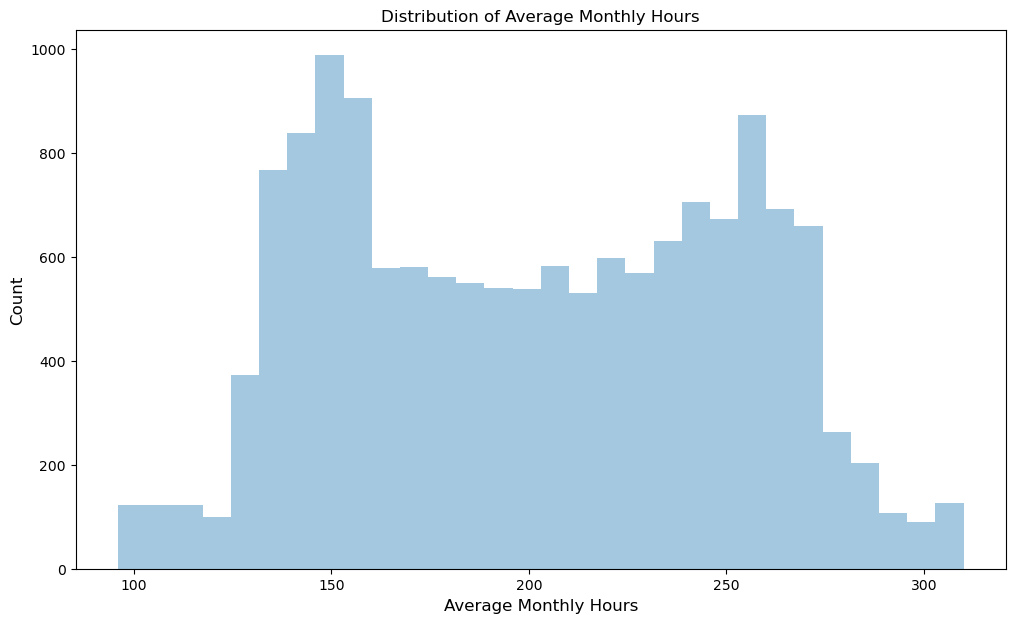

In [15]:
plt.figure(figsize=(12,7))
sns.distplot(df.average_montly_hours,bins=30,kde=False)
plt.title("Distribution of Average Monthly Hours")
plt.xlabel("Average Monthly Hours",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

Text(0.5, 1.0, 'Employee Turnover with Average Monthly Hours')

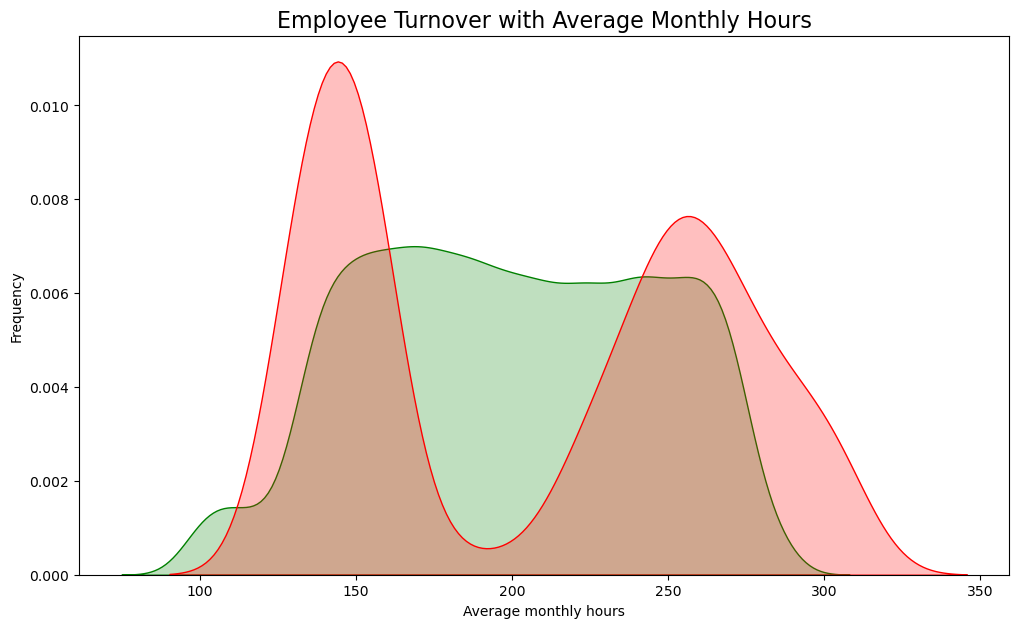

In [16]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(df.loc[(df.target==0),'average_montly_hours'],color="g",shade=True,label="Stays in company")
ax=sns.kdeplot(df.loc[(df.target==1),'average_montly_hours'],color="r",shade=True,label="Left the company")
ax.set(xlabel='Average monthly hours',ylabel="Frequency")
plt.title("Employee Turnover with Average Monthly Hours",fontsize=16)

Text(0, 0.5, 'Count')

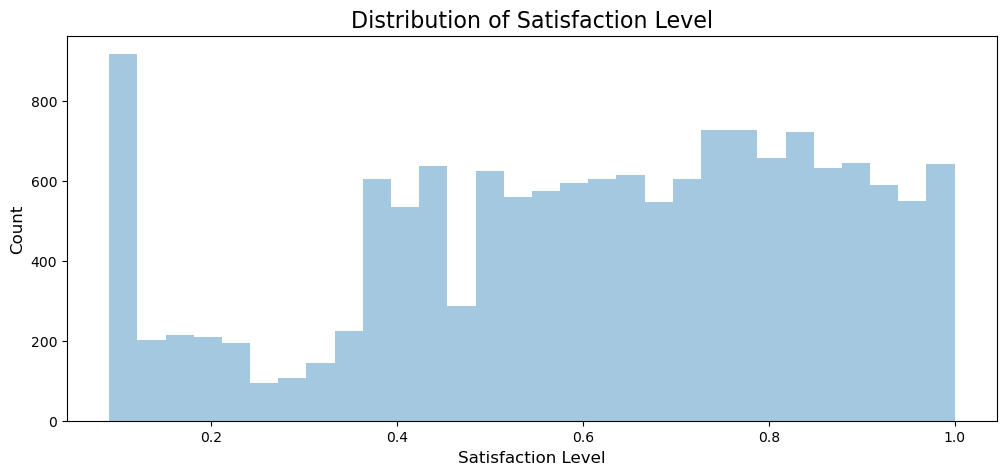

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(df.satisfaction_level,kde=False)
plt.title("Distribution of Satisfaction Level",fontsize=16)
plt.xlabel("Satisfaction Level",fontsize=12)
plt.ylabel("Count",fontsize=12)

Text(0.5, 0.98, 'Satisfaction level Vs Turnover')

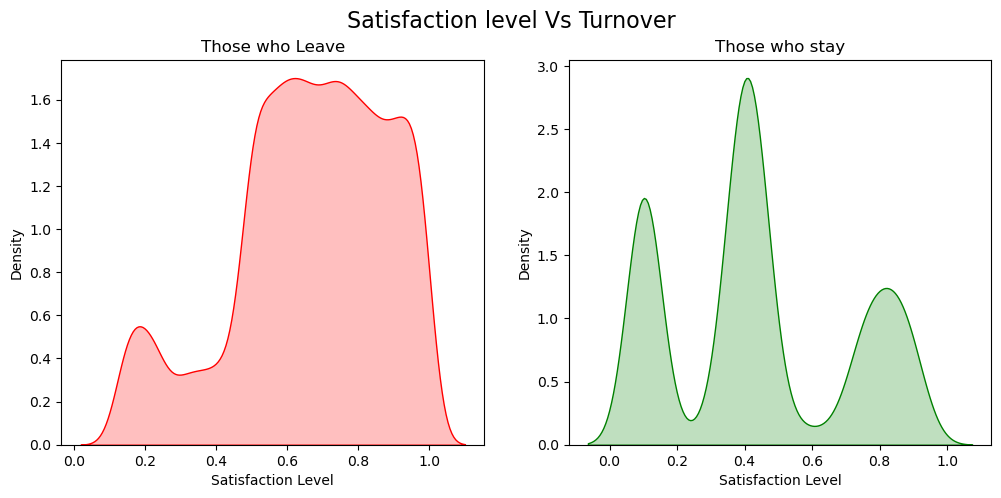

In [18]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
left=df[df.target==0]
stay=df[df.target==1]
sns.kdeplot(left.satisfaction_level,shade=True,color="r",ax=ax[0],legend=False)
ax[0].set_xlabel("Satisfaction Level")
ax[0].set_ylabel("Density")
ax[0].set_title("Those who Leave")
sns.kdeplot(stay.satisfaction_level,shade=True,color="g",ax=ax[1],legend=False)
ax[1].set_xlabel("Satisfaction Level")
ax[1].set_ylabel('Density')
ax[1].set_title('Those who stay')
plt.suptitle("Satisfaction level Vs Turnover",fontsize=16)

Text(0.5, 1.0, 'Number of Projects Vs Turnover')

<Figure size 1200x800 with 0 Axes>

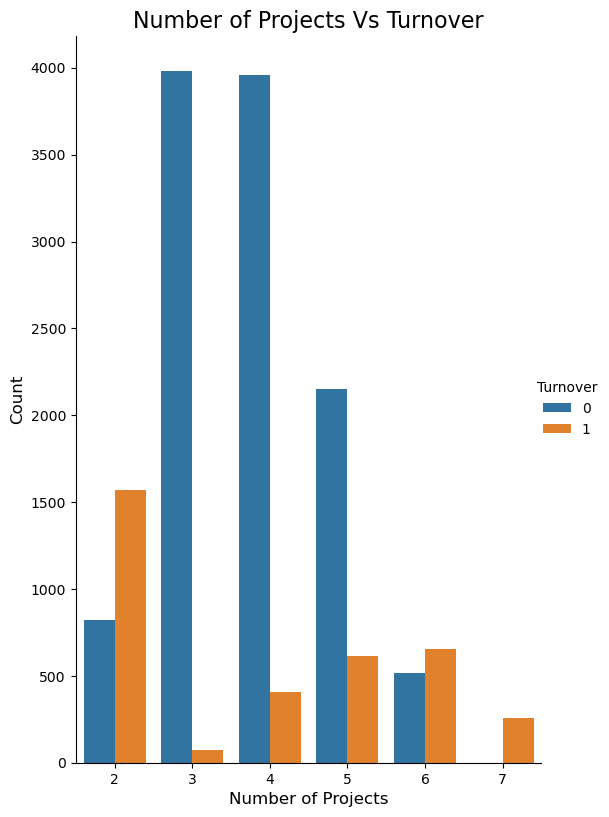

In [19]:
fig=plt.figure(figsize=(12,8))
g=sns.factorplot(x="number_project",hue="target",data=df,kind="count",legend_out=True,size=8,aspect=0.7)
g._legend.set_title("Turnover")
plt.xlabel("Number of Projects",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Number of Projects Vs Turnover",fontsize=16)

Text(0.5, 1.0, 'Boxplot of Satisfaction Level with Number of Projects')

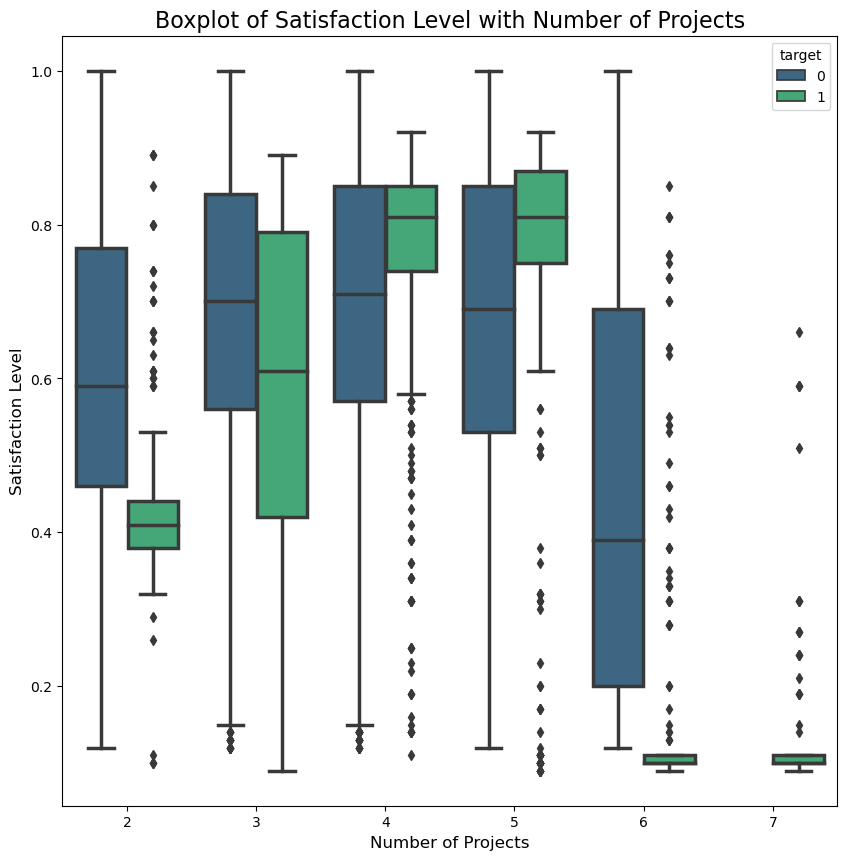

In [20]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(x="number_project",y="satisfaction_level",hue="target",data=df,palette='viridis',linewidth=2.5)
plt.xlabel("Number of Projects",fontsize=12)
plt.ylabel("Satisfaction Level",fontsize=12)
plt.title("Boxplot of Satisfaction Level with Number of Projects",fontsize=16)

In [21]:
df.last_evaluation.describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

In [22]:
print("There are {} people having evaluation score greater than 0.7".format(len(df[df.last_evaluation>0.7])))
print("There are {} people having evaluation score lesser than 0.7".format(len(df[df.last_evaluation<0.7])))


There are 7802 people having evaluation score greater than 0.7
There are 6984 people having evaluation score lesser than 0.7


Text(0.5, 1.0, 'Distribution of Evaluation')

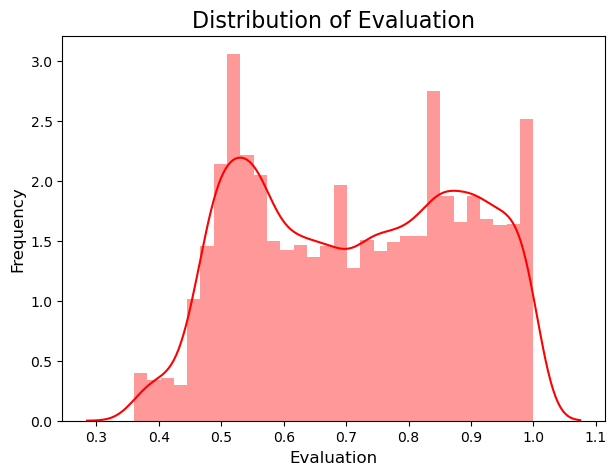

In [23]:
plt.figure(figsize=(7,5))
sns.distplot(df.last_evaluation,bins=30,color="r")
plt.xlabel("Evaluation",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.title("Distribution of Evaluation",fontsize=16)

Text(0.5, 1.2, 'Trend of Turnover with Number of Projects and Evaluation')

<Figure size 700x800 with 0 Axes>

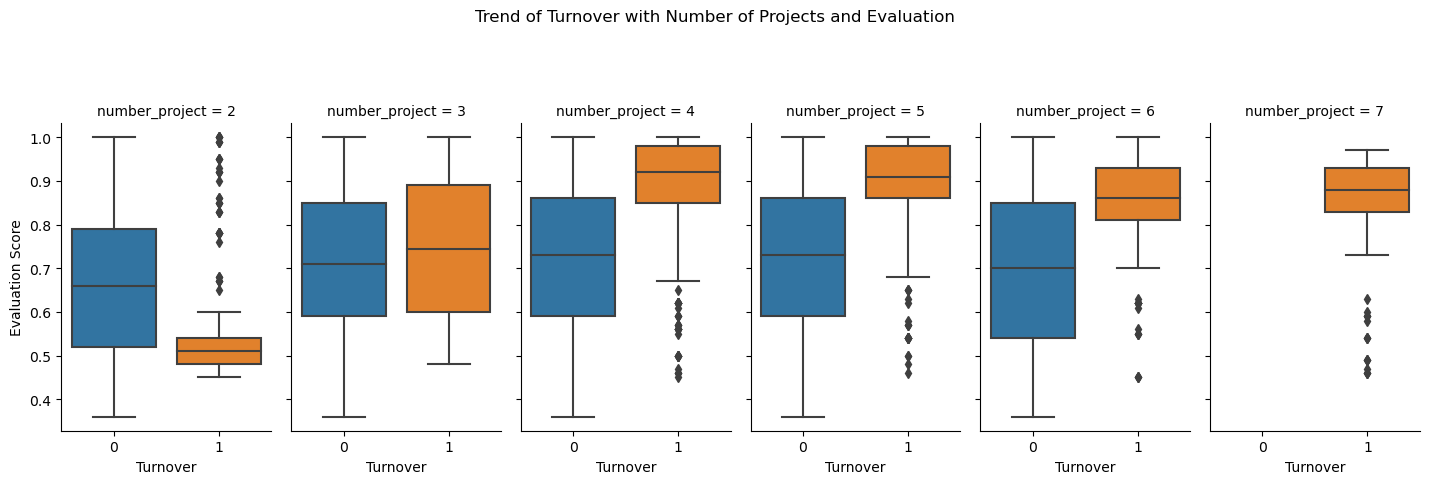

In [24]:
ax=plt.figure(figsize=(7,8))
ax=sns.factorplot(x="target",y="last_evaluation",col="number_project",data=df,kind="box",size=4,aspect=0.6)
#ax.set(xlabel="Turnover",ylabel="EvaluationScore",title="Trend of Turnover with Number of Projects and Evaluation")
ax.set_xlabels("Turnover")
ax.set_ylabels('Evaluation Score')
ax.fig.suptitle("Trend of Turnover with Number of Projects and Evaluation",x=0.5,y=1.2)

In [25]:
pd.crosstab(df["time_spend_company"],df["target"],margins=False).apply(lambda x: (x/x.sum())*100).round()

target,0,1
time_spend_company,,
2,28.0,1.0
3,43.0,44.0
4,15.0,25.0
5,6.0,23.0
6,4.0,6.0
7,2.0,0.0
8,1.0,0.0
10,2.0,0.0


(0.0, 50.0)

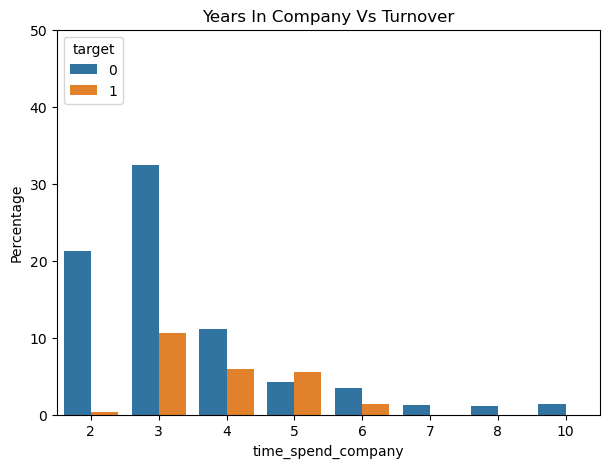

In [26]:
ax=plt.figure(figsize=(7,5))
ax=sns.barplot(x="time_spend_company",y="time_spend_company",data=df,hue="target",estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percentage")
ax.set(title="Years In Company Vs Turnover")
ax.set_ylim(0,50)

Text(0.5, 1.0, 'Last 5 Year Promotion Count')

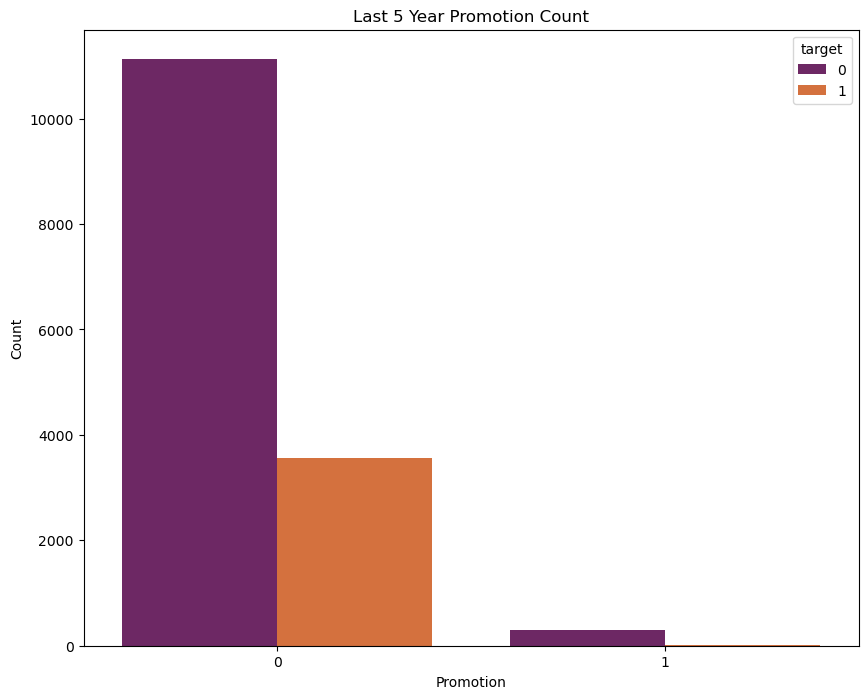

In [27]:
ax=plt.figure(figsize=(10,8))
ax=sns.countplot(x="promotion_last_5years",hue="target",palette="inferno",data=df)
ax.set_xlabel("Promotion")
ax.set_ylabel("Count")
ax.set_title("Last 5 Year Promotion Count")

In [28]:
(df.salary.value_counts(normalize=True))*100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

Text(0, 0.5, 'Count')

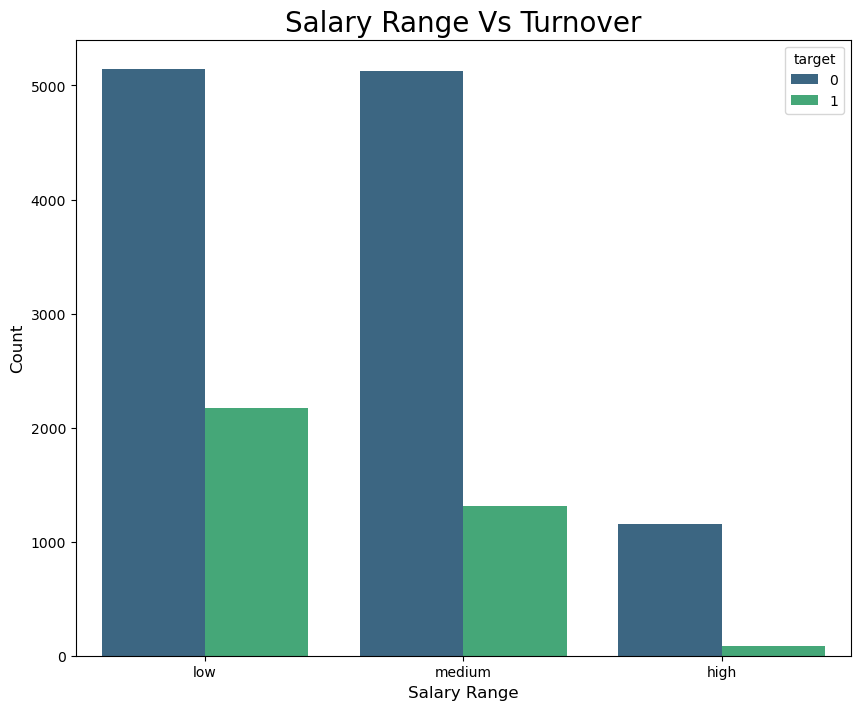

In [29]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x="salary",hue="target",data=df,order=df.salary.value_counts().iloc[:].index,palette="viridis")
ax.set_title("Salary Range Vs Turnover",fontsize=20)
ax.set_xlabel("Salary Range",fontsize=12)
ax.set_ylabel("Count",fontsize=12)

Text(0, 0.5, 'Satisfaction Level')

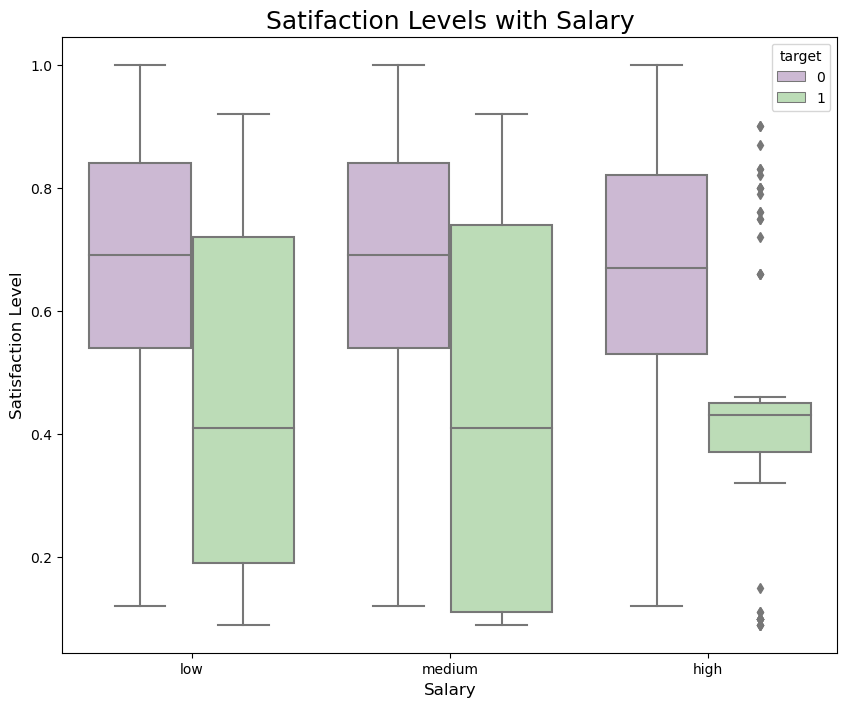

In [30]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(x="salary",y="satisfaction_level",hue="target",data=df,palette="PRGn")
ax.set_title("Satifaction Levels with Salary",fontsize=18)
ax.set_xlabel("Salary",fontsize=12)
ax.set_ylabel("Satisfaction Level",fontsize=12)


Text(0.5, 1.0, 'Low Salary:Department Count')

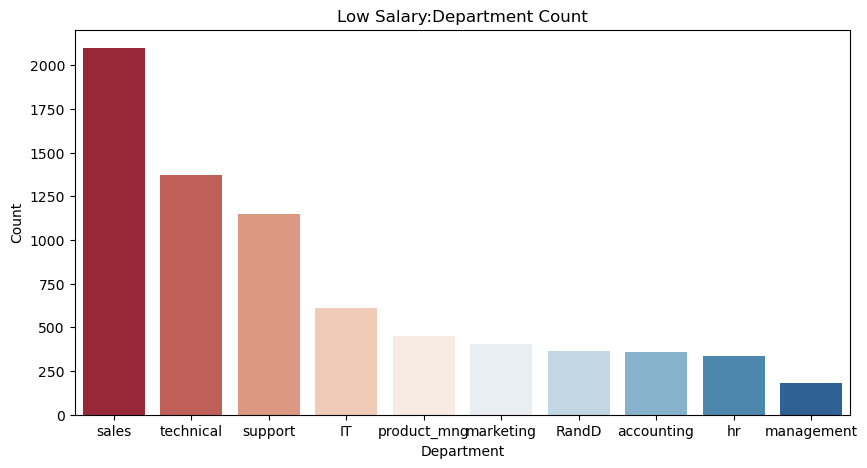

In [31]:
sal=pd.DataFrame(df[df.salary=="low"].Department.value_counts())
sal.reset_index(level=0,inplace=True)
sal=sal.sort_values(by='Department',ascending=False)
sal.columns=("Department","Count")
plt.figure(figsize=(10,5))
sns.barplot(x="Department",y="Count",data=sal,palette="RdBu")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Low Salary:Department Count")

Text(0.5, 1.0, 'Medium Salary:Department Count')

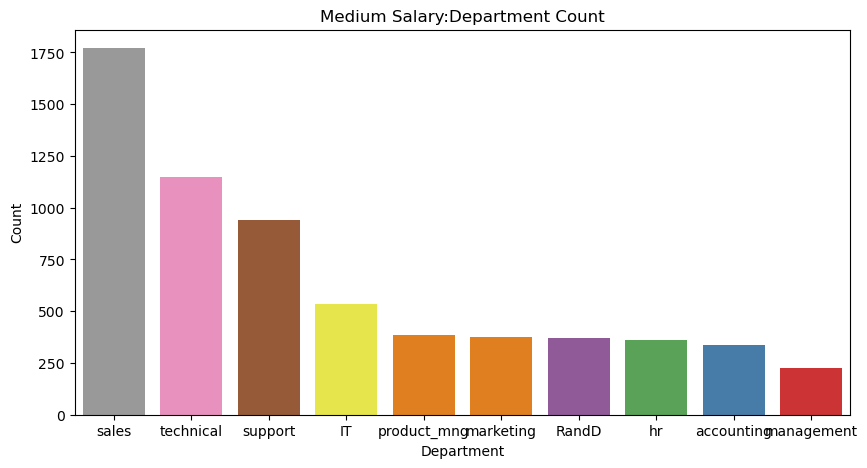

In [32]:
sal=pd.DataFrame(df[df.salary=="medium"].Department.value_counts())
sal.reset_index(level=0,inplace=True)
sal=sal.sort_values(by='Department',ascending=False)
sal.columns=("Department","Count")

plt.figure(figsize=(10,5))
sns.barplot(x="Department",y="Count",data=sal,palette="Set1_r")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Medium Salary:Department Count")

Text(0.5, 1.0, 'High Salary:Department Count')

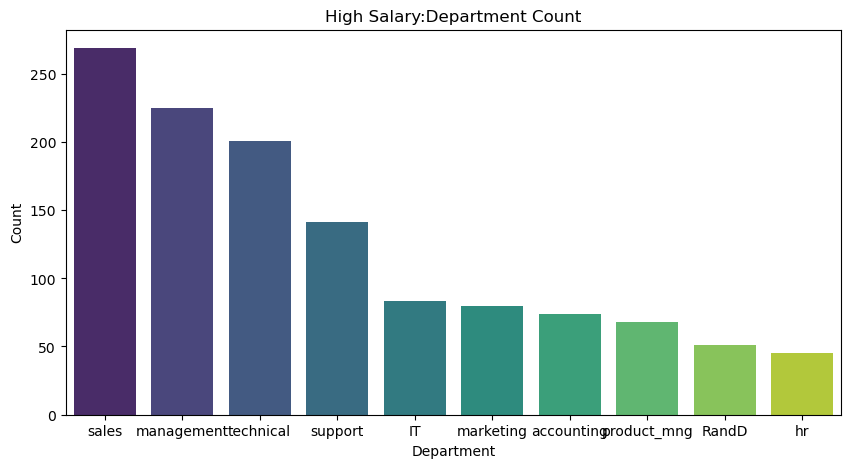

In [33]:
sal=pd.DataFrame(df[df.salary=="high"].Department.value_counts())
sal.reset_index(level=0,inplace=True)
sal=sal.sort_values(by='Department',ascending=False)
sal.columns=("Department","Count")

plt.figure(figsize=(10,5))
sns.barplot(x="Department",y="Count",data=sal,palette="viridis")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("High Salary:Department Count")

In [34]:
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

Text(0.5, 0, 'Department')

<Figure size 1000x800 with 0 Axes>

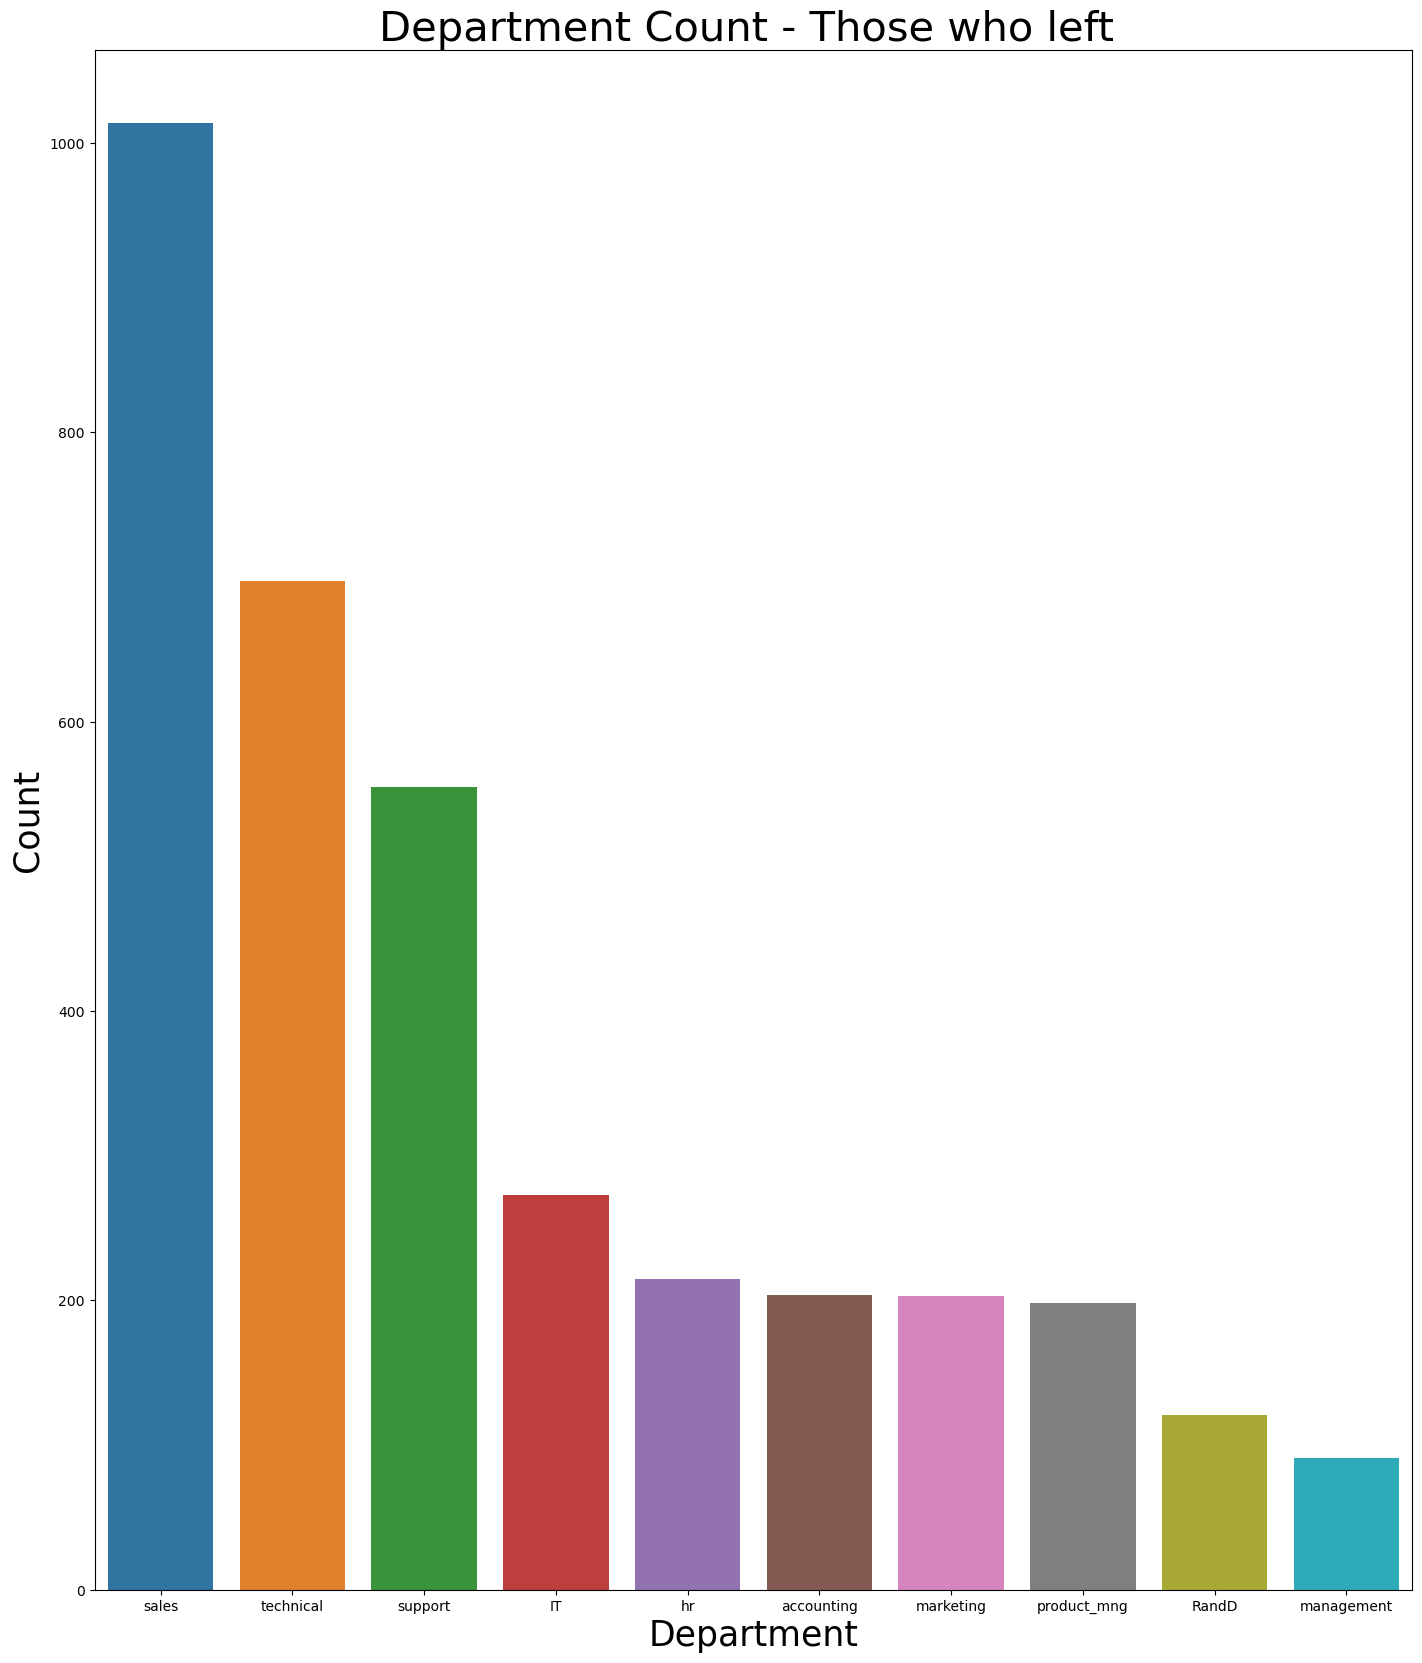

In [35]:
ax=plt.figure(figsize=(10,8))
left=pd.DataFrame(df[df.target==1].Department.value_counts())
left.reset_index(level=0,inplace=True)
left=left.sort_values(by='Department',ascending=False)
left.columns=("Department","count")
plt.figure(figsize=(17,20))
sns.barplot(x = 'Department', y = 'count', data = left)
plt.title('Department Count - Those who left ', fontsize = 30)
plt.ylabel('Count', fontsize = 25)
plt.xlabel('Department', fontsize = 25)

Text(0.5, 0, 'Department')

<Figure size 1000x800 with 0 Axes>

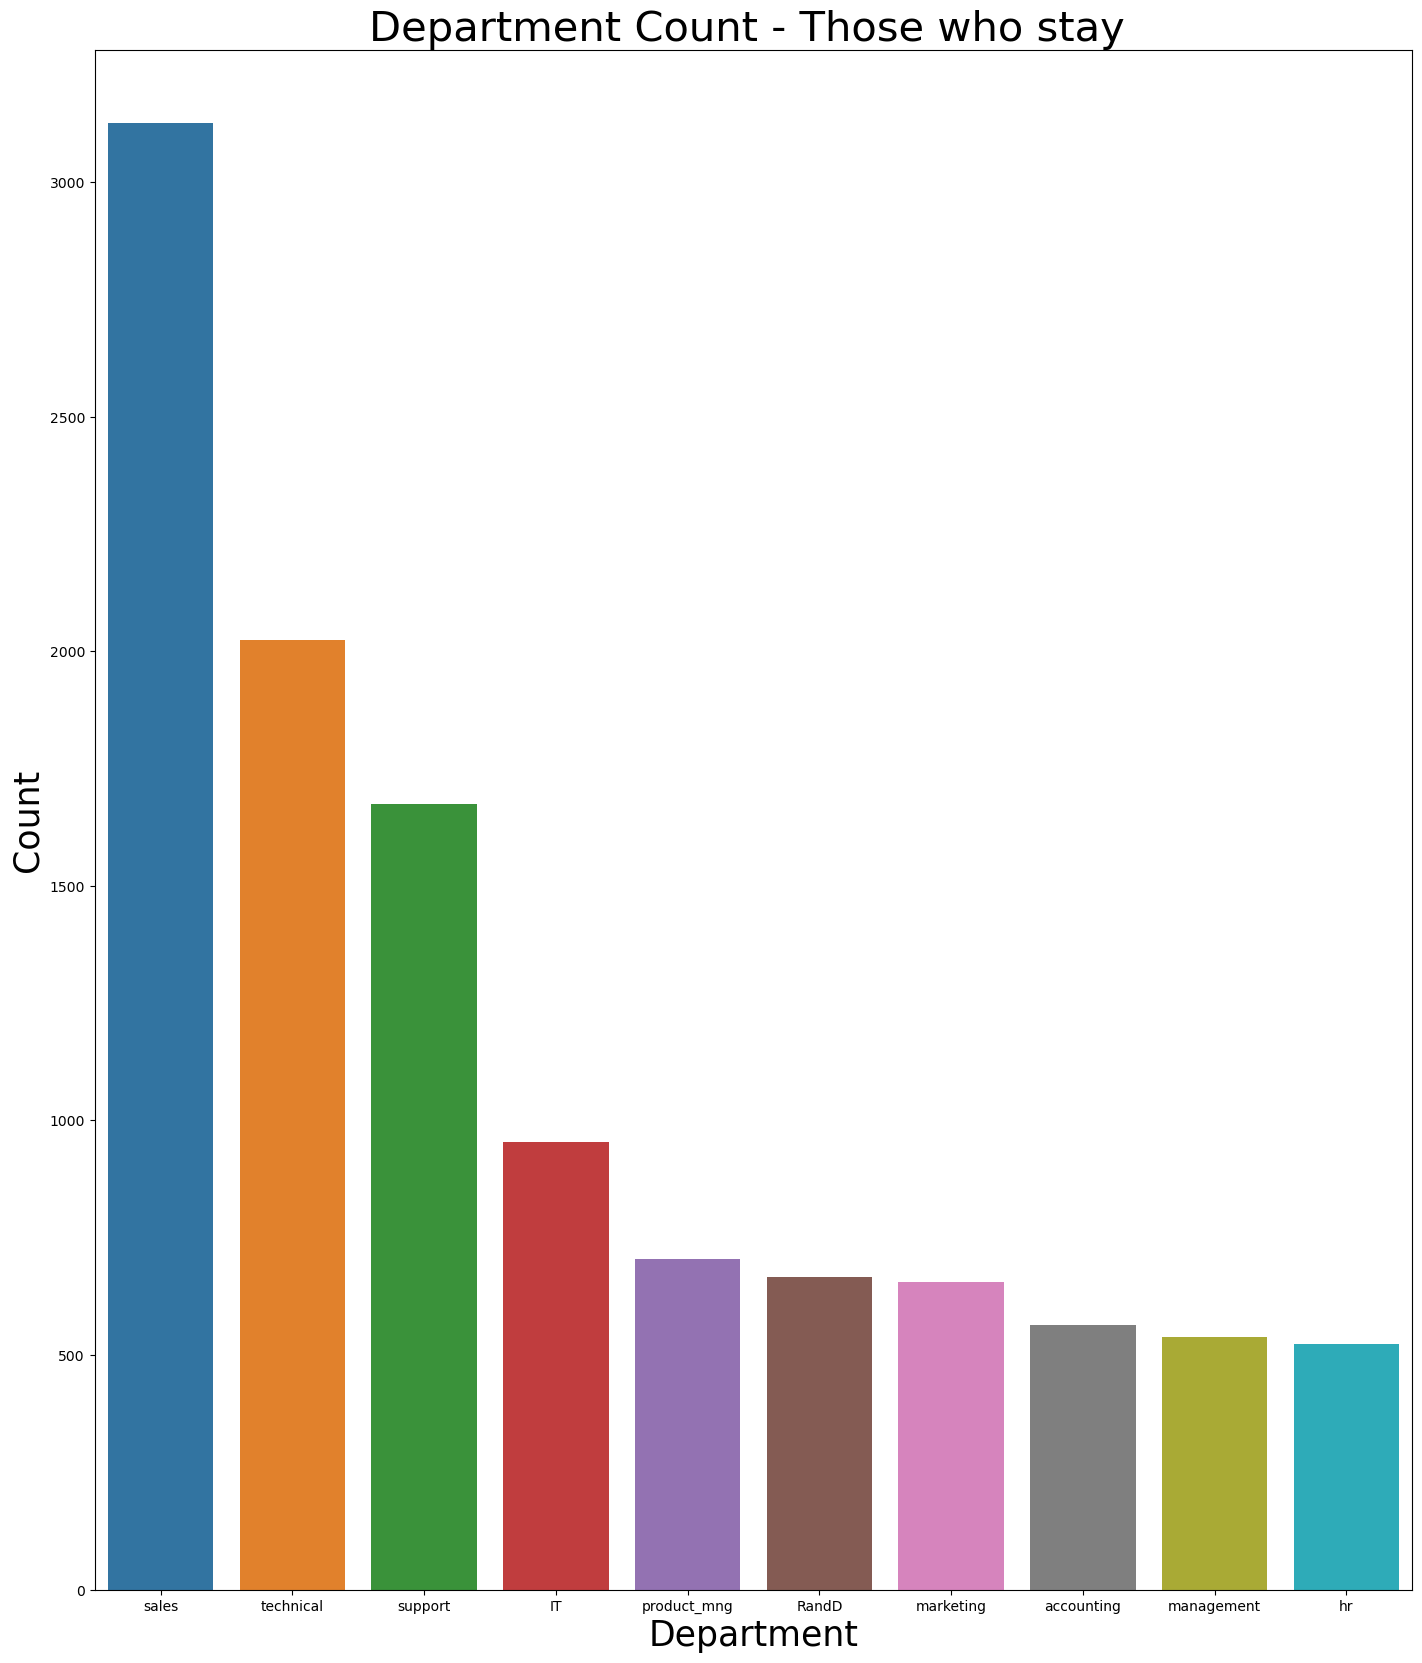

In [36]:
ax=plt.figure(figsize=(10,8))
stay=pd.DataFrame(df[df.target==0].Department.value_counts())
stay.reset_index(level=0,inplace=True)
stay=stay.sort_values(by='Department',ascending=False)
stay.columns=("Department","count")
plt.figure(figsize=(17,20))
sns.barplot(x = 'Department', y = 'count', data = stay)
plt.title('Department Count - Those who stay ', fontsize = 30)
plt.ylabel('Count', fontsize = 25)
plt.xlabel('Department', fontsize = 25)

In [37]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,target,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
target,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

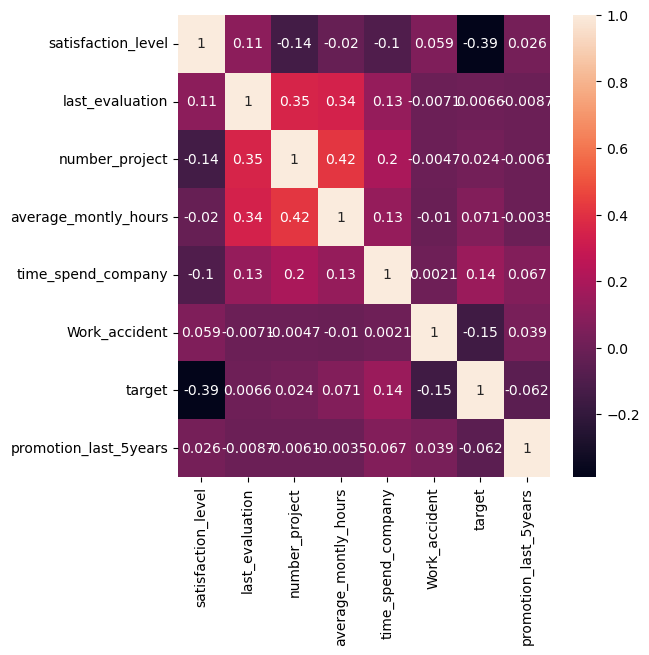

In [38]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(6,6))
sns.heatmap(corr, annot=True,ax=ax)

In [39]:
print(df.shape)

(14999, 10)


In [40]:
df=df.drop_duplicates()
print(df.shape)

(11991, 10)


In [42]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df['salary']=le.fit_transform(df['salary'])
df['Department']=le.fit_transform(df['Department'])

In [45]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df['salary']=le.fit_transform(df['salary'])
df['Department']=le.fit_transform(df['Department'])


In [47]:
# Spliting data into Feature and
X=df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary']]
y=df['target']
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [49]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Train the model using the training sets
gb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gb.predict(X_test)

In [50]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9799888827126181
Precision: 0.9585492227979274
Recall: 0.9203980099502488
